# Loading libraries and connecting to dataset

In [48]:
# import necessary libraries
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
# upload the file from your computer
uploaded = files.upload()

# load csv file
dataset = pd.read_csv('data.csv')
# dataset.info()

Saving data.csv to data (2).csv


In [104]:
dataset.head()

,userId,sessionReferrer,browser,deviceType,estimatedAnnualIncome,estimatedPropertyType,visitCount,pageURL,ctaCopy,ctaPlacement,editorialSnippet,scrolledPage,scrollDepth,clickedCTA,scheduledAppointment,revenue,mortgageVariation
0,user_97048,Google,Safari,Mobile,152000,Apartment,1,https://www.financialservices.com/mortgages/ty...,First Time? We've Made it Easy to Find the Bes...,Middle,"Understand the pros and cons of fixed-rate, ad...",1,75,0,0,0,NaN
1,user_14393,Social,Safari,Mobile,140000,Apartment,2,https://www.financialservices.com/mortgages/ho...,Access Your Personalized Mortgage Rates Now,Bottom,Equip yourself with knowledge. Understand the ...,1,25,0,0,0,NaN
2,user_30959,Direct,Safari,Mobile,128000,House,1,https://www.financialservices.com/mortgages/fi...,Access Your Personalized Mortgage Rates Now,Bottom,Navigate the home buying journey with confiden...,1,75,0,0,0,NaN
3,user_88588,Google,Chrome,Mobile,205000,Apartment,1,https://www.financialservices.com/mortgages/re...,Get Pre-Approved for a Mortgage in 5 Minutes,Middle,Our tools help you assess whether refinancing ...,1,75,1,0,0,NaN
4,user_65965,Google,Safari,Mobile,373000,House,1,https://www.financialservices.com/mortgages/re...,Access Your Personalized Mortgage Rates Now,Top,Navigate the complexities of mortgage rates wi...,0,0,0,0,0,NaN


# Part 1

In [105]:
## adding some more columns to the original dataframe

dataset2 = dataset
# turning the quotes into categories
dataset2['ctaCopyNumber'] = np.where(dataset2['ctaCopy']== 'Access Your Personalized Mortgage Rates Now', '3', np.where(dataset2['ctaCopy']== 'Get Pre-Approved for a Mortgage in 5 Minutes', '2', '1'))
# turning the ctaPlacement into categories
dataset2['ctaPlacementNumber'] = np.where(dataset2['ctaPlacement']== 'Bottom', '3', np.where(dataset2['ctaPlacement']== 'Middle', '2', '1'))
dataset2.head()

,userId,sessionReferrer,browser,deviceType,estimatedAnnualIncome,estimatedPropertyType,visitCount,pageURL,ctaCopy,ctaPlacement,editorialSnippet,scrolledPage,scrollDepth,clickedCTA,scheduledAppointment,revenue,mortgageVariation,ctaCopyNumber,ctaPlacementNumber
0,user_97048,Google,Safari,Mobile,152000,Apartment,1,https://www.financialservices.com/mortgages/ty...,First Time? We've Made it Easy to Find the Bes...,Middle,"Understand the pros and cons of fixed-rate, ad...",1,75,0,0,0,NaN,1,2
1,user_14393,Social,Safari,Mobile,140000,Apartment,2,https://www.financialservices.com/mortgages/ho...,Access Your Personalized Mortgage Rates Now,Bottom,Equip yourself with knowledge. Understand the ...,1,25,0,0,0,NaN,3,3
2,user_30959,Direct,Safari,Mobile,128000,House,1,https://www.financialservices.com/mortgages/fi...,Access Your Personalized Mortgage Rates Now,Bottom,Navigate the home buying journey with confiden...,1,75,0,0,0,NaN,3,3
3,user_88588,Google,Chrome,Mobile,205000,Apartment,1,https://www.financialservices.com/mortgages/re...,Get Pre-Approved for a Mortgage in 5 Minutes,Middle,Our tools help you assess whether refinancing ...,1,75,1,0,0,NaN,2,2
4,user_65965,Google,Safari,Mobile,373000,House,1,https://www.financialservices.com/mortgages/re...,Access Your Personalized Mortgage Rates Now,Top,Navigate the complexities of mortgage rates wi...,0,0,0,0,0,NaN,3,1


**Which CTA Copy and CTA Placement did the best/worst?**

In [106]:
ctaCopyNumberlist = ["1","2","3"]
# 1 = "First time?..."
# 2 = "Get preapproved..."
# 3 = "Access your personalized..."
ctaPlacementNumberlist = ["1","2","3"]
# 1 = top
# 2 = middle
# 3 = bottom

# most clicks / least clicks
def countfunc(banner, placement, column):
# initialize a dictionary that stores the counts for each of the combinations of ctaCopyNumberlist and ctaPlacementNumberlist
  counts = {}
  # for each combination, count the number of times there is a 1 in the column passed to the function where i and j are as passed in the function iterator
  for i in ctaCopyNumberlist:
    for j in ctaPlacementNumberlist:
      counts[(i,j)] = len(dataset2[(dataset2['ctaCopyNumber'] == i) & (dataset2['ctaPlacementNumber'] == j) & (dataset2[column] == 1)])
    # also want to return max and min counts
  max_key = max(counts, key=counts.get)
  min_key = min(counts, key=counts.get)

  return column, counts, max_key, min_key

print(countfunc(ctaCopyNumberlist, ctaPlacementNumberlist, 'clickedCTA'))

# most booking / least booking
print(countfunc(ctaCopyNumberlist, ctaPlacementNumberlist, 'scheduledAppointment'))

# most revenue / least revenue
def countrevenuefunc(banner, placement, column):
# initialize a dictionary that stores the revenue for each of the combinations of ctaCopyNumberlist and ctaPlacementNumberlist
  countrevenue = {}
  # for each combination, add to the total revenue where i and j are as passed in the function iterator
  for i in ctaCopyNumberlist:
    for j in ctaPlacementNumberlist:
    # sum the revenue in the revenue column where the i and j conditions are matched
      countrevenue[(i,j)] = dataset2[(dataset2['ctaCopyNumber'] == i) & (dataset2['ctaPlacementNumber'] == j)]['revenue'].sum()
    # also want to return max and min counts
  max_key = max(countrevenue, key=countrevenue.get)
  min_key = min(countrevenue, key=countrevenue.get)

  return column, countrevenue, max_key, min_key

print(countrevenuefunc(ctaCopyNumberlist, ctaPlacementNumberlist, 'revenue'))


('clickedCTA', {('1', '1'): 2205, ('1', '2'): 1888, ('1', '3'): 1701, ('2', '1'): 2353, ('2', '2'): 2037, ('2', '3'): 1713, ('3', '1'): 2072, ('3', '2'): 1794, ('3', '3'): 1498}, ('2', '1'), ('3', '3'))
('scheduledAppointment', {('1', '1'): 606, ('1', '2'): 591, ('1', '3'): 632, ('2', '1'): 670, ('2', '2'): 643, ('2', '3'): 630, ('3', '1'): 607, ('3', '2'): 563, ('3', '3'): 575}, ('2', '1'), ('3', '2'))
('revenue', {('1', '1'): 136520, ('1', '2'): 134125, ('1', '3'): 143390, ('2', '1'): 140910, ('2', '2'): 130595, ('2', '3'): 129970, ('3', '1'): 134675, ('3', '2'): 126935, ('3', '3'): 125915}, ('1', '3'), ('3', '3'))


From the above analysis, we see that the most clicks, bookings, and revenues do not all come from the same combinations of placement and CTA banner.  

The majority of clicks and bookings come from CTA 2 ("Get preapproved...") with a top placement. 2353 clicks and 670 bookings were made from this placement. This combination also helped generate \$140,910 in revenue. However, one thing to note is that this was not the max revenue generating combo. The max revenue generating combo ("First time?... with bottom placement") generated $143,390.

The least effective CTA by far was "Access your personalized mortgage rates now." It continuously led to the least clicks, bookings, and revenue. When combined with bottom placement, it led to the least clicks and revenue - 1498 and $125,915 respectively. And, when combined with middle placement, it resulted in the least bookings - only 563.

I strongly believe that, as a company, if we are trying to maximize revenue we should **eliminate "Access your personalized mortgage rates now" especially with bottom placement ** and **serve "First time? We've made it easy to find the best mortgage rate." with bottom placement** as our champion.

However, we should note here that the most bookings differs from the one with the highest revenue. We should continue to monitor the high booking combination as well as there may be the exception that a high-booking CTA consistently converts customers into loyal users who bring additional value over time.

**If we called one of these CTA combinations our champion (serve it 100% of the time), how much incrementally is that worth to us vs. the average of the rest of the split test?**

In [107]:
# already know that the best revenue comes from ('1', '3')
# "First time...?"", bottom placement
# revenue = $143,390

# dictionary for 'clickedCTA'
countclickedCTA = {
    ('1', '1'): 2205,
    ('1', '2'): 1888,
    ('1', '3'): 1701,
    ('2', '1'): 2353,
    ('2', '2'): 2037,
    ('2', '3'): 1713,
    ('3', '1'): 2072,
    ('3', '2'): 1794,
    ('3', '3'): 1498
}

# dictionary for 'scheduledAppointment'
countscheduledAppointment = {
    ('1', '1'): 606,
    ('1', '2'): 591,
    ('1', '3'): 632,
    ('2', '1'): 670,
    ('2', '2'): 643,
    ('2', '3'): 630,
    ('3', '1'): 607,
    ('3', '2'): 563,
    ('3', '3'): 575
}

# dictionary for 'revenue'
countrevenue = {
    ('1', '1'): 136520,
    ('1', '2'): 134125,
    ('1', '3'): 143390,
    ('2', '1'): 140910,
    ('2', '2'): 130595,
    ('2', '3'): 129970,
    ('3', '1'): 134675,
    ('3', '2'): 126935,
    ('3', '3'): 125915
}


# calculate the average revenue of all CTA combinations
total_revenue = sum(countrevenue.values())
num_combinations = len(countrevenue)
average_revenue = total_revenue / num_combinations

# identify the revenue of the champion CTA combination
champion_revenue = 143390

# calculate incremental revenue
incremental_revenue = champion_revenue - average_revenue

print("Average Revenue of All Combinations:", "$", round(average_revenue,2))
print("Champion CTA Revenue:", "$", round(champion_revenue,2))
print("Incremental Revenue if Champion Used 100% of Time:", "$", round(incremental_revenue,2))

Average Revenue of All Combinations: $ 133670.56
Champion CTA Revenue: $ 143390
Incremental Revenue if Champion Used 100% of Time: $ 9719.44


By using the champion combo, we gain **$ 9719.44**.

# Part 2

**Which groups of people tend to be more correlated or less correlated with our key metrics?**

In order to see relationships between key metrics, we can look at referral sources and financial backgrounds.


<ipython-input-108-cbbe01c519a1>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


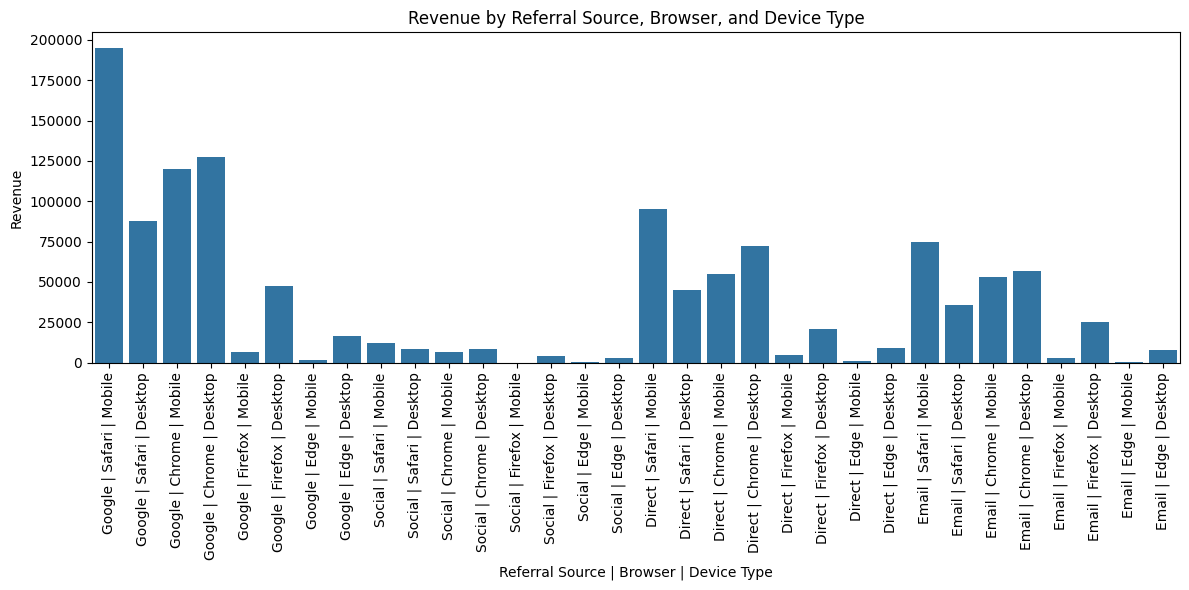

In [108]:
# referral sources = sessionReferrer, browser, devicetype
referrerlst = list(dataset2['sessionReferrer'].unique())
browserlst = list(dataset2['browser'].unique())
devicelst = list(dataset2['deviceType'].unique())
referralrevenue = {}

for i in referrerlst:
  for j in browserlst:
    for k in devicelst:
      referralrevenue[(i,j, k)] = dataset2[(dataset2['sessionReferrer'] == i) & (dataset2['browser'] == j) & (dataset2['deviceType'] == k)]['revenue'].sum()

# df from referralrevenue dictionary
referral_data = []
for (referrer, browser, device), revenue in referralrevenue.items():
    referral_data.append({'sessionReferrer': referrer, 'browser': browser, 'deviceType': device, 'revenue': revenue})

df_referral = pd.DataFrame(referral_data)

# combine sessionReferrer, browser, and deviceType into a new column
df_referral['combined'] = df_referral['sessionReferrer'] + ' | ' + df_referral['browser'] + ' | ' + df_referral['deviceType']

# plot
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=df_referral,
                   x='combined',
                   y='revenue'
                   )

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('Revenue by Referral Source, Browser, and Device Type')
plot.set_xlabel('Referral Source | Browser | Device Type')
plot.set_ylabel('Revenue')

plt.tight_layout()
plt.show()

<ipython-input-109-b262b9ddb9ee>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_revenue = dataset2.groupby('estimatedAnnualIncomeBins')['revenue'].sum().reset_index()
<ipython-input-109-b262b9ddb9ee>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


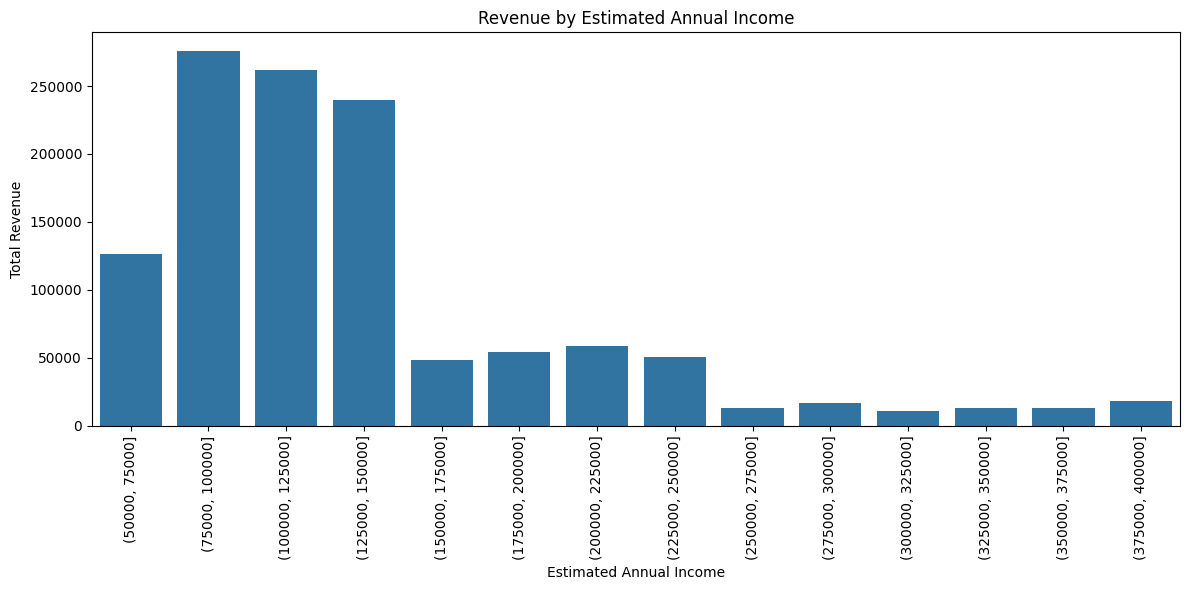

In [109]:
# financial backgrounds = estimatedannualincome, estimatedpropertytype

# bar chart showing relationship between revenue and estimatedannual income with binned incomes where min income is 50000 and max is 400000
dataset2['estimatedAnnualIncome'].max()
dataset2['estimatedAnnualIncome'].min()

# define income bins
income_bins = [
    (50000, 75000),
    (75000, 100000),
    (100000, 125000),
    (125000, 150000),
    (150000, 175000),
    (175000, 200000),
    (200000, 225000),
    (225000, 250000),
    (250000, 275000),
    (275000, 300000),
    (300000, 325000),
    (325000, 350000),
    (350000, 375000),
    (375000, 400000)
]

# bin 'estimatedAnnualIncome' column
dataset2['estimatedAnnualIncomeBins'] = pd.cut(
    dataset2['estimatedAnnualIncome'],
    bins=[income_bin[0] for income_bin in income_bins] + [income_bins[-1][1]]
)

# group by bins and sum revenue
binned_revenue = dataset2.groupby('estimatedAnnualIncomeBins')['revenue'].sum().reset_index()

# plotting revenue by income bins
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=binned_revenue,
                   x='estimatedAnnualIncomeBins',
                   y='revenue'
                   )
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('Revenue by Estimated Annual Income')
plot.set_xlabel('Estimated Annual Income')
plot.set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

<ipython-input-110-3871549ecd39>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset2.groupby('estimatedAnnualIncomeBins')['revenue']


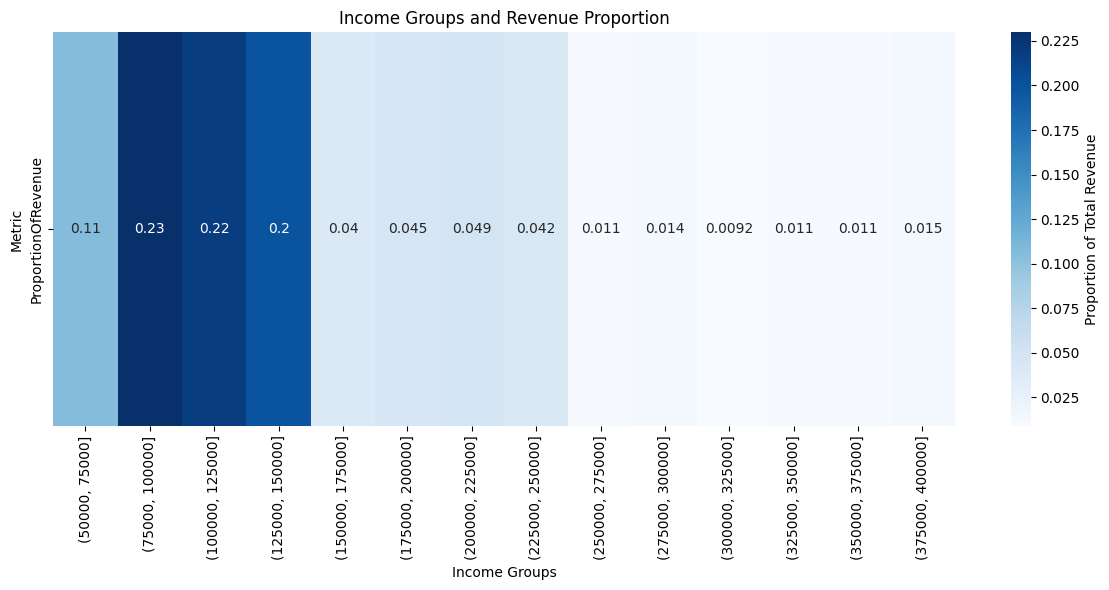

In [110]:
# ensure the bins are numeric for calculations
binned_revenue = (
    dataset2.groupby('estimatedAnnualIncomeBins')['revenue']
    .sum()
    .reset_index()
)

# normalize revenue for correlation-style heatmap
binned_revenue['ProportionOfRevenue'] = binned_revenue['revenue'] / binned_revenue['revenue'].sum()

# pivot data for heatmap
heatmap_data = binned_revenue[['estimatedAnnualIncomeBins', 'ProportionOfRevenue']].set_index('estimatedAnnualIncomeBins').T

# map
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion of Total Revenue'})

plt.title('Income Groups and Revenue Proportion')
plt.xlabel('Income Groups')
plt.ylabel('Metric')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-111-a4889f0fd798>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

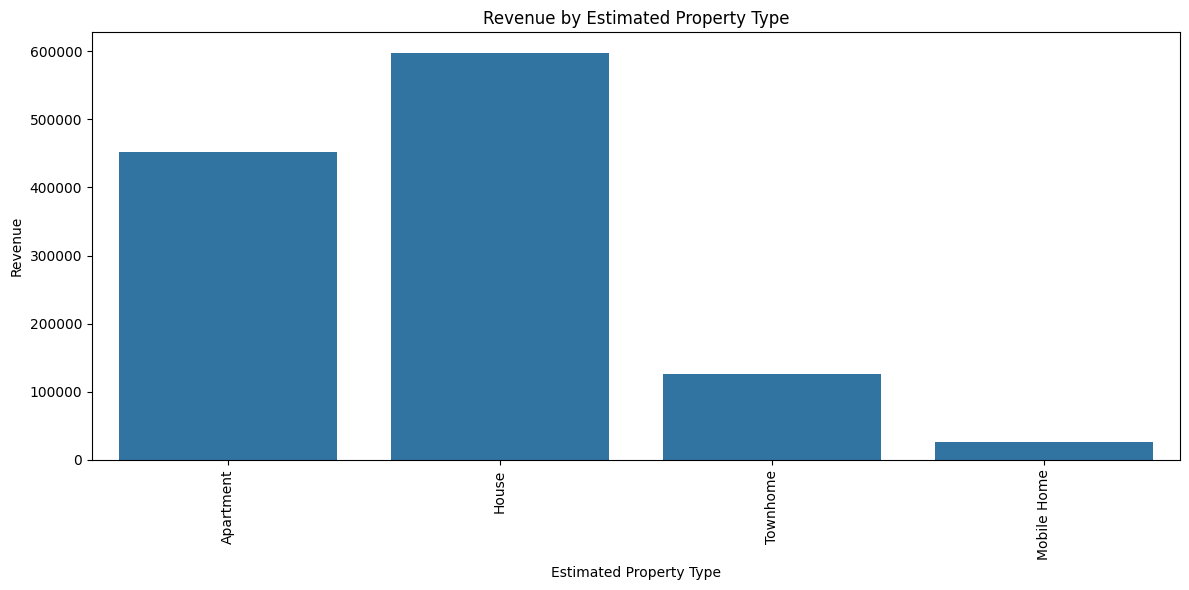

In [111]:
# bar chart showing revenue by property type
plt.figure(figsize=(12, 6))
plot = sns.barplot(data=df_financial,
                   x='estimatedPropertyType',
                   y='revenue'
                   )

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('Revenue by Estimated Property Type')
plot.set_xlabel('Estimated Property Type')
plot.set_ylabel('Revenue')

plt.tight_layout()
plt

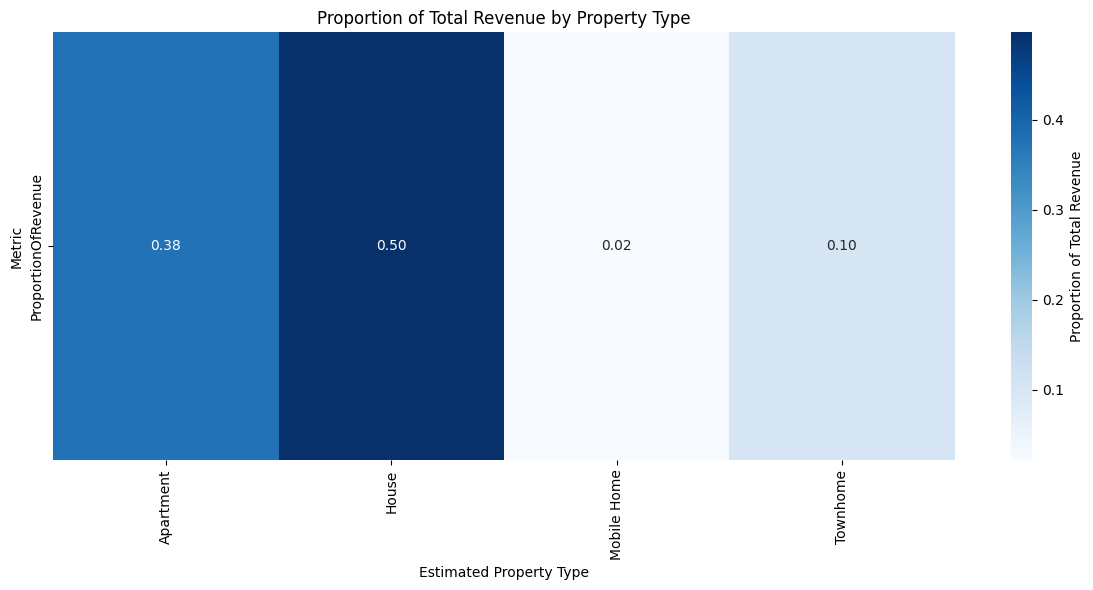

In [112]:
# aggregate revenue by property type
property_revenue = (
    df_financial.groupby('estimatedPropertyType')['revenue']
    .sum()
    .reset_index()
)

# normalize revenue
property_revenue['ProportionOfRevenue'] = property_revenue['revenue'] / property_revenue['revenue'].sum()

# pivot data for heatmap
heatmap_data = property_revenue.set_index('estimatedPropertyType')[['ProportionOfRevenue']]

# map
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Proportion of Total Revenue'})

plt.title('Proportion of Total Revenue by Property Type')
plt.xlabel('Estimated Property Type')
plt.ylabel('Metric')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

From the above analyses, we see that there are certain groups of people which tend to be more/less correlated with our key metric of revenue.  
On the referral side, we see that there are certain mediums from which customers come from that lead to more revenues. Each medium was created using a combo of sessionReferrer, browser, and deviceType. With 4/5 of the top revenue generators, the most popular sessionReferrer is is Google. On the other hand, email and social media tend to be much less effective.  
On the financial side, we see that our company is generating the majority of revenues from the lower range of incomes. ~\$900K in revenue was generated of those having incomes less than or equal to \$150K per year. We generated 76% of our income from this group. Of this, 23% came from those with incomes between \$75-100K and 22% came from those with incomes between \$100-125K. Additionally, 38% of our revenue came from apartments and 50% came from houses. So, it seems like our best target audience is homebuyers of incomes between \$75-125K.

While we did investigate the sessionReferrers at first, the financial trends seem more relevant and important. We can further analyze these using heatmaps to see if there are groups of people who drove higher/lower numbers when engaging with specific CTA copies and placements.  

<ipython-input-113-5c36a9d2bc2f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_cta_corr = dataset2.groupby(['estimatedAnnualIncomeBins', 'ctaCombo'])['clickedCTA'].sum().unstack(fill_value=0)


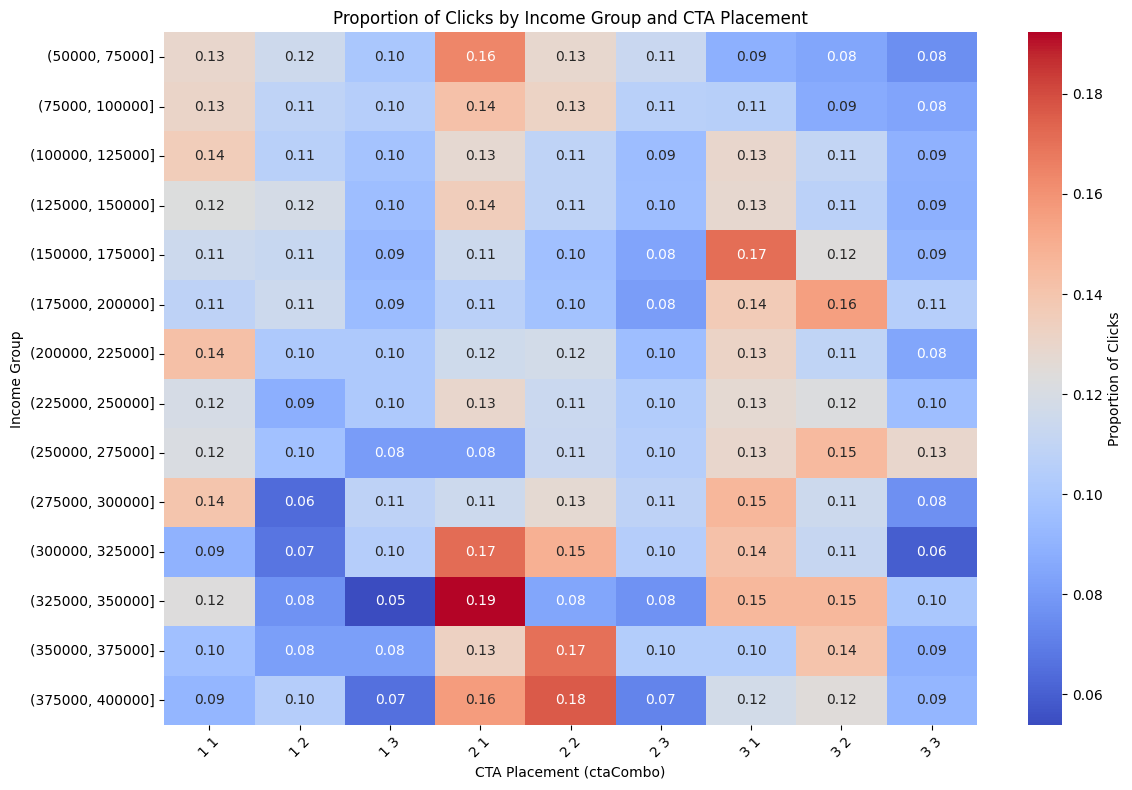

In [113]:
# first we just want to make combo category which combines the ctaCopyNumber and ctaPlacementNumber
dataset2['ctaCombo'] = (dataset2['ctaCopyNumber'].astype(str) + ' ' + dataset2['ctaPlacementNumber'].astype(str))
dataset2.head()

# plan: facet by each ctaCombo, look into clickedCTA & scheduledAppointment, do by income group
# makes map to show how each income group correlated with placement clicks and schedules

# clicks

# grouping the data by income bins and CTA combinations, then computing the sum of clickedCTA
income_cta_corr = dataset2.groupby(['estimatedAnnualIncomeBins', 'ctaCombo'])['clickedCTA'].sum().unstack(fill_value=0)

# normalizing within each income bin to show relative importance of each CTACombo
income_cta_corr_normalized = income_cta_corr.div(income_cta_corr.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    income_cta_corr_normalized,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Proportion of Clicks'}
)
plt.title("Proportion of Clicks by Income Group and CTA Placement")
plt.xlabel("CTA Placement (ctaCombo)")
plt.ylabel("Income Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-114-fcde479e6e75>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_cta_corr1 = dataset2.groupby(['estimatedAnnualIncomeBins', 'ctaCombo'])['scheduledAppointment'].sum().unstack(fill_value=0)


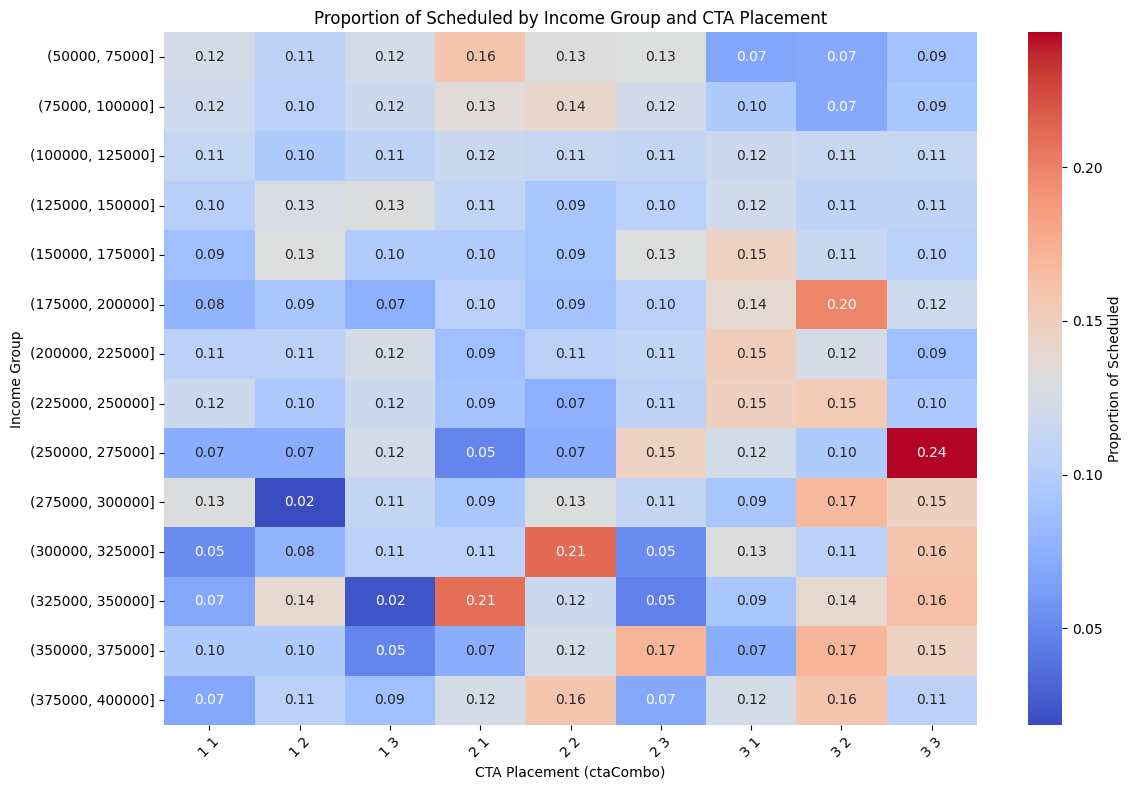

In [114]:
# scheduled
# grouping the data by income bins and CTA combinations, then computing the sum of clickedCTA
income_cta_corr1 = dataset2.groupby(['estimatedAnnualIncomeBins', 'ctaCombo'])['scheduledAppointment'].sum().unstack(fill_value=0)

# normalizing within each income bin to show relative importance of each CTACombo
income_cta_corr_normalized1 = income_cta_corr1.div(income_cta_corr1.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    income_cta_corr_normalized1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Proportion of Scheduled'}
)
plt.title("Proportion of Scheduled by Income Group and CTA Placement")
plt.xlabel("CTA Placement (ctaCombo)")
plt.ylabel("Income Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In order to better identify if there were groups of people who drove higher/lower numbers when engaging with specific CTA copies and placements, I thought to boil down the financials to just the income spread. By creating 2 different heatmaps, I was able to analyze how income had a correlation on the clicks and whether an appointment was scheduled or not. Both of these things are important precursors when it comes to revenue, so it's essential to see which placements affect which groups of people most.  


Key Insights Click Heatmap:

* Higher income groups (especially \$300,000 - \$350,000) appear to be more selective and show distinct preferences for specific CTA placements ('2 1' and '2 2'), suggesting that certain placements may resonate better with this demographic.
* Lower-income groups do not display extreme engagement variations across CTA placements, potentially indicating a more consistent engagement pattern across different placements.

More details:


*   High Engagement (Darker Red) Areas: The income groups \$150K - \$175K and \$300K - \$325K have higher proportions of clicks for the '2 1' CTA placement.
The \$325K - \$350K group has a very high engagement for the '2 2' CTA placement.
These income groups were particularly responsive to these specific CTA placements, potentially driving higher engagement.
*   Lower Engagement (Darker Blue) Areas:
The income group \$275K - \$300K shows lower engagement in general, especially for the '1 2' and '3 3' CTA placements.
The \$325K - \$350K group also had lower engagement with '1 3' and '3 3' placements, even though they engaged more with '2 2'. Lower engagement levels might indicate a lack of interest or effectiveness of these placements for specific income brackets.
* Moderate Engagement Patterns: Many income groups around \$200K to \$250K show moderate engagement across multiple placements, without a strong preference for any particular CTA. The income groups \$50K - \$100K show fairly balanced engagement across various CTA placements without any significant highs or lows.



Key Insights Scheduled Appointments Heatmap:
* Higher-income groups seem to be more responsive to specific placements (especially in placement "2"), suggesting that targeted CTA placement strategies might increase engagement with these groups.
* Middle- and lower-income groups do not show strong preferences for specific placements, but some lower-performing placements (e.g., '1 2' for \$275K - \$300K) could be reconsidered or restructured.
* CTA placements '2 2' and '2 3' show promise as effective options for encouraging scheduling among various income brackets, especially in the higher-income ranges.

More details:
* High Scheduling Rates (Darker Red) Areas: Income group \$250K - \$275K shows the highest engagement for scheduling appointments with the '2 3' CTA placement, as seen by the darkest red cell at 0.24.
The \$175K - \$200K group also shows a notable preference for '2 2', with a proportion of 0.20.
Additionally, \$300K - \$325K and \$325K - \$350K income groups have moderate to high scheduling rates with the '2 2' and '2 1' CTA placements, respectively.
These patterns suggest that the CTA placement in the "2" row (middle position) was more effective at driving scheduling among higher-income groups.
* Lower Scheduling Rates (Darker Blue) Areas:
Lower-income groups like \$75K - \$125K show consistently lower scheduling rates across various CTA placements, with no strong preference for any specific placement. The income group \$275K - \$300K has especially low scheduling rates with the '1 2' placement (proportion of 0.02), indicating that this placement was not effective for this group.
* Moderate Engagement Patterns: The middle-income groups, especially \$225K - \$250K and \$200K - \$225K, show moderate scheduling rates across placements, without any placement being a clear standout. These income groups do not seem to have a significant bias toward any one CTA layout.

# Part 3

From the analysis above, we saw that income played a huge role in which CTA was most effective in getting someone to schedule an appointment. Ultimately, the more sheduled appointments, the more revenue. So, we are going to build a model based on the estimated income which outputs the best CTA class. Then, we will compare it to the CTA class actually assigned to see the differences in revenue we could've gotten.

In [117]:
#income_cta_corr_normalized1 #scheduling
# create new datframe from income_cta_corr_normalized1 where for each estimatedAnnualIncomeBins note the max ctaCombo for that row
maxctaCombodf1 = income_cta_corr_normalized1.idxmax(axis=1).reset_index()
maxctaCombodf1.columns = ['estimatedAnnualIncomeBins', 'maxctaCombo1']
maxctaCombodf1

,estimatedAnnualIncomeBins,maxctaCombo1
0,"(50000, 75000]",2 1
1,"(75000, 100000]",2 2
2,"(100000, 125000]",3 1
3,"(125000, 150000]",1 3
4,"(150000, 175000]",3 1
5,"(175000, 200000]",3 2
6,"(200000, 225000]",3 1
7,"(225000, 250000]",3 2
8,"(250000, 275000]",3 3
9,"(275000, 300000]",3 2


In [128]:
# making a simplieified dataset
part3data = dataset2
part3data['originalIncome'] = dataset2['estimatedAnnualIncome']
colstodrop = ['userId', 'originalIncome', 'visitCount', 'pageURL', 'ctaCopy', 'ctaPlacement','scrollDepth', 'mortgageVariation', 'scrolledPage' , 'editorialSnippet']
part3data = part3data.drop(colstodrop, axis=1)
part3data.rename(columns={'ctaCombo': 'ctaComboRecieved'}, inplace=True)
# find and input in column the corresponding best value for each user based on income from maxctaCombodf1
part3data = part3data.merge(maxctaCombodf1, on='estimatedAnnualIncomeBins', how='left')

from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
label_encoder = LabelEncoder()

# transform ctaComboRecieved column
part3data['ctaComboRecieved'] = label_encoder.fit_transform(part3data['ctaComboRecieved'])

# mapping reference
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of ctaComboRecieved categories to numeric values:")
print(mapping)

part3data.head()

Mapping of ctaComboRecieved categories to numeric values:
{'1 1': 0, '1 2': 1, '1 3': 2, '2 1': 3, '2 2': 4, '2 3': 5, '3 1': 6, '3 2': 7, '3 3': 8}


,sessionReferrer,browser,deviceType,estimatedAnnualIncome,estimatedPropertyType,clickedCTA,scheduledAppointment,revenue,ctaCopyNumber,ctaPlacementNumber,estimatedAnnualIncomeBins,ctaComboRecieved,maxctaCombo1
0,Google,Safari,Mobile,152000,Apartment,0,0,0,1,2,"(150000, 175000]",1,3 1
1,Social,Safari,Mobile,140000,Apartment,0,0,0,3,3,"(125000, 150000]",8,1 3
2,Direct,Safari,Mobile,128000,House,0,0,0,3,3,"(125000, 150000]",8,1 3
3,Google,Chrome,Mobile,205000,Apartment,1,0,0,2,2,"(200000, 225000]",4,3 1
4,Google,Safari,Mobile,373000,House,0,0,0,3,1,"(350000, 375000]",6,2 3


In [178]:
data = part3data.copy()

# drop rows with missing values
data = data.dropna()

# convert `estimatedAnnualIncomeBins` intervals to numeric labels
data['estimatedAnnualIncomeBins'] = data['estimatedAnnualIncomeBins'].astype(str)  # Convert intervals to strings
income_bins_encoder = LabelEncoder()
data['estimatedAnnualIncomeBins'] = income_bins_encoder.fit_transform(data['estimatedAnnualIncomeBins'])

# encode categorical variables
label_encoders = {}
categorical_cols = ['sessionReferrer', 'browser', 'deviceType', 'estimatedPropertyType']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# convert `ctaComboRecieved` and `maxctaCombo1` to numeric
cta_combo_encoder = LabelEncoder()
data['ctaComboRecieved'] = cta_combo_encoder.fit_transform(data['ctaComboRecieved'])

max_cta_combo_encoder = LabelEncoder()
data['maxctaCombo1'] = max_cta_combo_encoder.fit_transform(data['maxctaCombo1'])

# making sure for correct data types for numeric columns
data['ctaCopyNumber'] = data['ctaCopyNumber'].astype(int)
data['ctaPlacementNumber'] = data['ctaPlacementNumber'].astype(int)

# split
X = data.drop(columns=['revenue', 'maxctaCombo1', 'estimatedAnnualIncomeBins'])
y = data['maxctaCombo1']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # 80% train, 20% temp

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)  # 20% validation, 20% test

# train model
model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# validate
y_val_pred = model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy Score:", accuracy_score(y_val, y_val_pred))

# predict
y_test_pred = model.predict(X_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))



Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2235
           1       0.99      1.00      0.99      1144
           2       1.00      0.99      1.00      2657
           3       0.95      0.94      0.94        77
           4       0.99      0.99      0.99      2921
           5       0.95      0.94      0.94       844
           6       0.85      0.82      0.83        83

    accuracy                           0.99      9961
   macro avg       0.96      0.95      0.96      9961
weighted avg       0.99      0.99      0.99      9961

Validation Accuracy Score: 0.988756148981026

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2234
           1       0.99      0.99      0.99      1145
           2       0.99      0.99      0.99      2658
           3       0.96      0.94      0.95        77
           4       0.99 

Test Accuracy Score: 0.987149884549744


In [185]:
# predict on the entire dataset
y_pred_full = model.predict(X)

# assign the predictions back
data['predicted_maxctaCombo1'] = y_pred_full

# data['predicted_maxctaCombo1'].unique() - should now show values from 0 to 8

array([4, 0, 3, 2, 1, 5, 6], dtype=int32)

In [188]:
# create the actualpredictedrevenuedict with the given values from part 1's dictionaries
actualpredictedrevenuedict = {
    ('0'): 136520 / 606,
    ('1'): 134125 / 591,
    ('2'): 143390 / 632,
    ('3'): 140910 / 670,
    ('4'): 130595 / 643,
    ('5'): 129970 / 630,
    ('6'): 134675 / 607,
    ('7'): 126935 / 563,
    ('8'): 125915 / 575
}

In [191]:
# map the revenue potential for `predicted_maxctaCombo1`
data['predicted_revenue_potential'] = data['predicted_maxctaCombo1'].astype(str).map(actualpredictedrevenuedict)

# map the revenue potential for `ctaComboRecieved`
data['actual_revenue_potential'] = data['ctaComboRecieved'].astype(str).map(actualpredictedrevenuedict)

# calculate revenue gain
data['revenue_gain'] = (
    data['predicted_revenue_potential'] - data['actual_revenue_potential']
)

# drop rows with NaN values in revenue calculations if necessary
data = data.dropna(subset=['predicted_revenue_potential', 'actual_revenue_potential', 'revenue_gain'])

# summarize total potential gain
total_gain = abs(data['revenue_gain'].sum())
print(f"Total Potential Revenue Gain: ${total_gain:.2f}")

Total Potential Revenue Gain: $71113.51


Knowing that we have many different customer and user profiles, we know that each of their needs differ. People from different backgrounds will have different incomes and properties, which will affect the type of financing they need. The type of financing they pick will affect our revenues so by ensuring that each customer gets the CTA and placement most suited to their attrubutes,we ultimately increase our own revenues. We make it more likely that they stay on the site longer to explore and scroll. As a result, they are more likely to click around and learn about our offerings, ultimately scheduling an apppointment for a mortgage offering that they need.

By making sure each customer gets the CTA and placement best fit to their profile, we can have a total potential revenue gain of $71,113.51 across all CTA and placement combinations